In [8]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import KernelPCA
from sklearn.pipeline import Pipeline

newsgroups = fetch_20newsgroups()

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('pca', KernelPCA(n_components=100, random_state=42))
])

pca_matrix = pipeline.fit_transform(newsgroups.data)
print("Shape:", pca_matrix.shape)


Shape: (11314, 100)


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_scores = []
K_range = range(2, 21)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(pca_matrix)
    score = silhouette_score(pca_matrix, labels)
    sil_scores.append(score)
    print(f"k={k}, silhouette={score:.4f}")


k=2, silhouette=0.1601
k=3, silhouette=0.1132
k=4, silhouette=0.1130
k=5, silhouette=0.1146
k=6, silhouette=0.0164
k=7, silhouette=0.0211
k=8, silhouette=0.0124
k=9, silhouette=0.0301
k=10, silhouette=0.0374
k=11, silhouette=0.0215
k=12, silhouette=0.0314
k=13, silhouette=0.0341
k=14, silhouette=0.0300
k=15, silhouette=0.0346
k=16, silhouette=0.0403
k=17, silhouette=0.0430
k=18, silhouette=0.0407
k=19, silhouette=0.0440
k=20, silhouette=0.0462


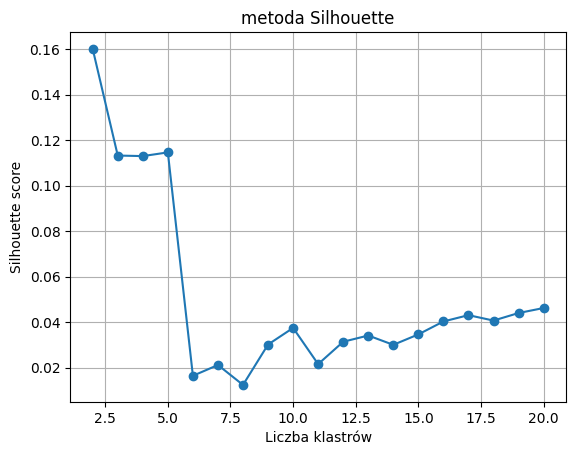

In [10]:
import matplotlib.pyplot as plt

plt.plot(K_range, sil_scores, marker='o')
plt.xlabel("Liczba klastrów")
plt.ylabel("Silhouette score")
plt.title("metoda Silhouette")
plt.grid(True)
plt.show()


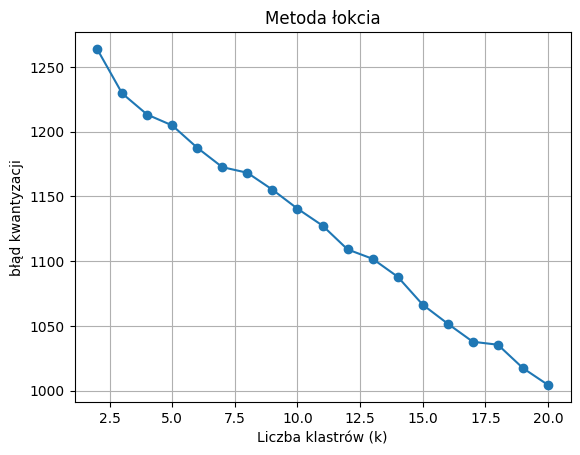

In [11]:
inertias = []

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(pca_matrix)
    inertias.append(model.inertia_)

plt.plot(K_range, inertias, marker='o')
plt.xlabel("Liczba klastrów (k)")
plt.ylabel("błąd kwantyzacji")
plt.title("Metoda łokcia")
plt.grid(True)
plt.show()

In [ ]:
best_k = 12
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(pca_matrix)

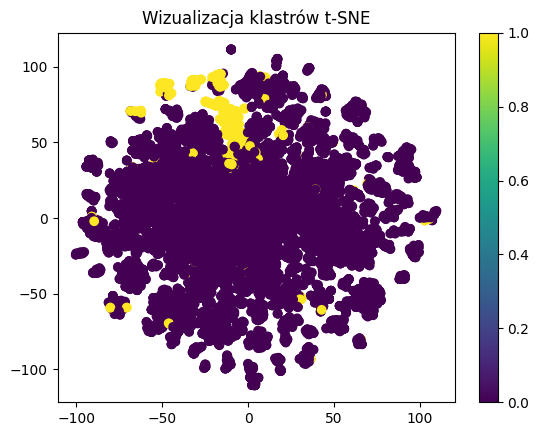

In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42, perplexity=15)
matrix_2d = tsne.fit_transform(pca_matrix)

plt.scatter(matrix_2d[:, 0], matrix_2d[:, 1], c=cluster_labels)
plt.colorbar()
plt.title("Wizualizacja klastrów t-SNE")
plt.show()


In [14]:
import numpy as np

vectorizer = TfidfVectorizer(stop_words='english')
tfidf = vectorizer.fit_transform(newsgroups.data)
feature_names = np.array(vectorizer.get_feature_names_out())

for c in range(best_k):
    cluster_idx = np.where(cluster_labels == c)[0]
    mean_vec = tfidf[cluster_idx].mean(axis=0).A1
    top = mean_vec.argsort()[-10:][::-1]
    
    print(f"\nKlaster {c}")
    print(feature_names[top])



Klaster 0
['edu' 'com' 'subject' 'lines' 'organization' 'writes' 'article'
 'university' 'don' 'posting']

Klaster 1
['nasa' 'space' 'gov' 'access' 'digex' 'henry' 'alaska' 'edu' 'pat'
 'toronto']
